In [1]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model checkpoints
srgan_checkpoint = "model/checkpoint_srgan.pth.tar"
srresnet_checkpoint = "model/checkpoint_srresnet.pth.tar"

In [3]:

# Load models
# srresnet = torch.load(srresnet_checkpoint)['model'].to(device)
# srresnet.eval()
srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
srgan_generator.eval()


/home/lamourdsy/.conda/envs/rul/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/lamourdsy/.conda/envs/rul/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.activation.Tanh' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/lamourdsy/.conda/envs/rul/lib/python3.7/site-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (residual_blocks): Sequential(
      (0): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): PReLU(num_parameters=1)
          )
        )
        (conv_block2): ConvolutionalBlock(
          (conv_block): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
      (1): ResidualBlock(
        (conv_block1): ConvolutionalBlock(
          (conv_block): Seque

In [4]:

"""
Visualizes the super-resolved images from the SRResNet and SRGAN for comparison with the bicubic-upsampled image
and the original high-resolution (HR) image, as done in the paper.
:param img: filepath of the HR iamge
:param halve: halve each dimension of the HR image to make sure it's not greater than the dimensions of your screen?
              For instance, for a 2160p HR image, the LR image will be of 540p (1080p/4) resolution. On a 1080p screen,
              you will therefore be looking at a comparison between a 540p LR image and a 1080p SR/HR image because
              your 1080p screen can only display the 2160p SR/HR image at a downsampled 1080p. This is only an
              APPARENT rescaling of 2x.
              If you want to reduce HR resolution by a different extent, modify accordingly.
"""

"\nVisualizes the super-resolved images from the SRResNet and SRGAN for comparison with the bicubic-upsampled image\nand the original high-resolution (HR) image, as done in the paper.\n:param img: filepath of the HR iamge\n:param halve: halve each dimension of the HR image to make sure it's not greater than the dimensions of your screen?\n              For instance, for a 2160p HR image, the LR image will be of 540p (1080p/4) resolution. On a 1080p screen,\n              you will therefore be looking at a comparison between a 540p LR image and a 1080p SR/HR image because\n              your 1080p screen can only display the 2160p SR/HR image at a downsampled 1080p. This is only an\n              APPARENT rescaling of 2x.\n              If you want to reduce HR resolution by a different extent, modify accordingly.\n"

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.image as mpimg

def hr(name, lr_img_provide = False):
    if lr_img_provide:
        lr_img = Image.open('img/'+ name + 'super_resolution_input.png', mode="r").convert('RGB')
        lr_img = lr_img.resize((int(lr_img.width / 1), int(lr_img.height /1)),
                               Image.BICUBIC)
        lr_img.save('img/'+ name + 'resolution_low_input.png')
    else:
        hr_img = Image.open('img/'+ name + 'super_resolution_input.png', mode="r")
        hr_img = hr_img.convert('RGB')
        # hr_img = hr_img.resize((int(hr_img.width / 2), int(hr_img.height / 2)), Image.LANCZOS)
        lr_img = hr_img.resize((int(hr_img.width / 4), int(hr_img.height / 4)),
                               Image.BICUBIC)
        lr_img.save('img/'+ name + 'resolution_low_input.png')

    #     # Load image, downsample to obtain low-res version
    #     hr_img = Image.open(img, mode="r")
    #     hr_img = hr_img.convert('RGB')
    #     if halve:
    #         hr_img = hr_img.resize((int(hr_img.width / 2), int(hr_img.height / 2)),
    #                                Image.LANCZOS)
    #     lr_img = hr_img.resize((int(hr_img.width / 4), int(hr_img.height / 4)),
    #                            Image.BICUBIC)

    #     # Bicubic Upsampling
    #     bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)

    # Super-resolution (SR) with SRResNet
    # sr_img_srresnet = srresnet(convert_image(lr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
    # sr_img_srresnet = sr_img_srresnet.squeeze(0).cpu().detach()
    # sr_img_srresnet = convert_image(sr_img_srresnet, source='[-1, 1]', target='pil')
    # sr_img_srresnet.save('img/srresnet_out.png')


    # # Super-resolution (SR) with SRGAN
    sr_img_srgan = srgan_generator(convert_image(lr_img, source='pil', target='imagenet-norm').unsqueeze(0).to(device))
    sr_img_srgan = sr_img_srgan.squeeze(0).cpu().detach()
    sr_img_srgan = convert_image(sr_img_srgan, source='[-1, 1]', target='pil')
    sr_img_srgan.save('img/'+ name + 'srgan_out.png')



    img_hr = mpimg.imread('img/'+ name + 'srgan_out.png')
    img_lr = mpimg.imread('img/'+ name + 'resolution_low_input.png')
    plt.figure(figsize=(30,15))
    ax = plt.subplot(121)
    ax.set_aspect(1)
    plt.imshow(img_hr)
    plt.subplot(122)
    plt.imshow(img_lr)
    plt.savefig('img/'+ name + 'merge_out.png')

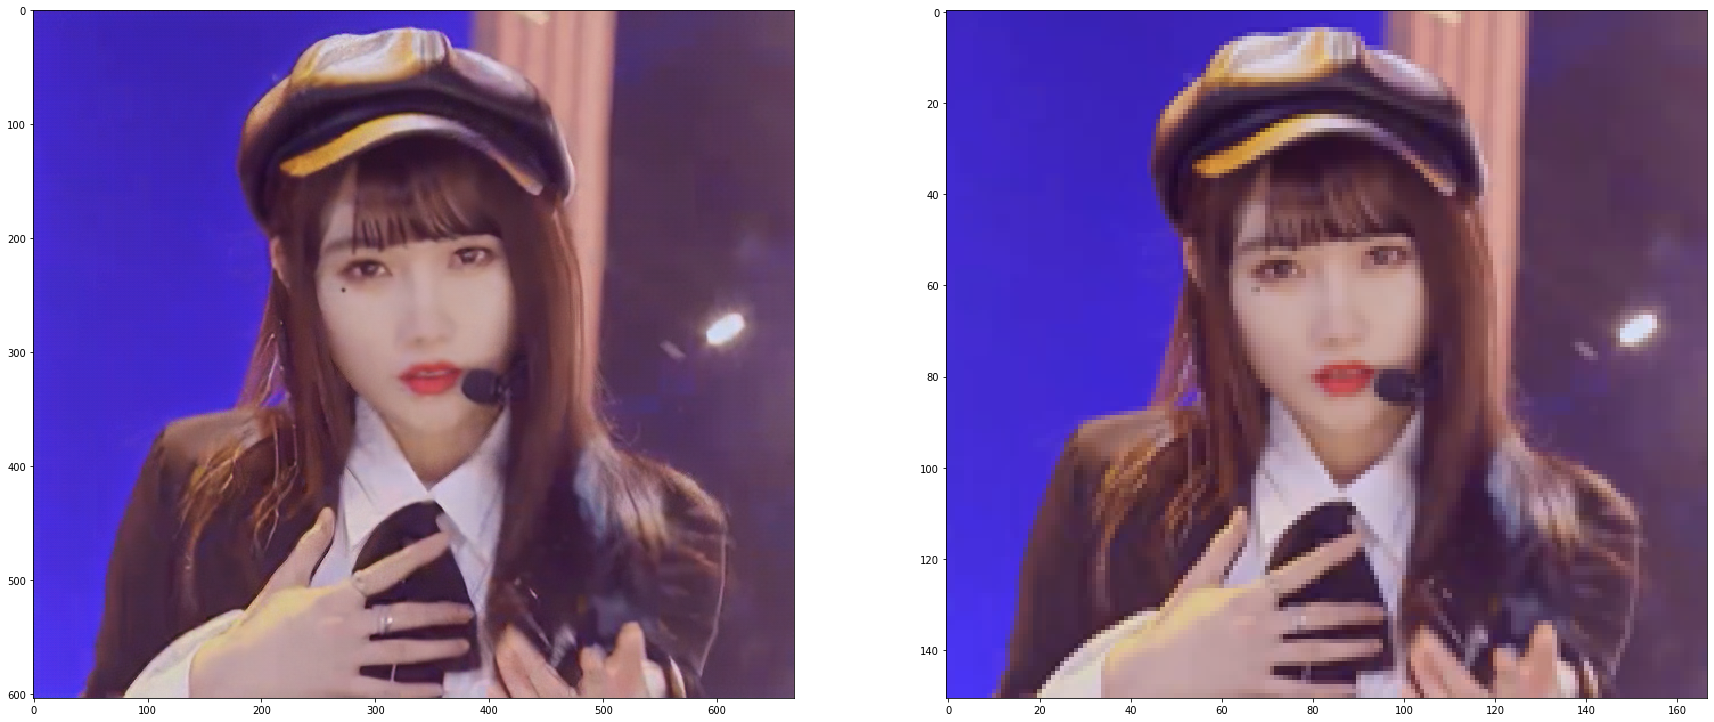

In [28]:
hr(name = 'ran5_',lr_img_provide = False)